# Week2授業課題2 富士下山問題

標高データの取得

In [21]:
import numpy as np
csv_path = "./mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [22]:
# 「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」
print(fuji[100:200])

[[  100.          35.302218   138.843458   772.58     32221.      ]
 [  101.          35.303895   138.840565   795.25     32544.      ]
 [  102.          35.305572   138.837673   817.62     32866.      ]
 [  103.          35.307249   138.834781   858.62     33188.      ]
 [  104.          35.308926   138.831888   883.89     33510.      ]
 [  105.          35.310603   138.828995   910.5      33832.      ]
 [  106.          35.31228    138.826102   932.74     34155.      ]
 [  107.          35.313957   138.823209   973.32     34477.      ]
 [  108.          35.315634   138.820316  1000.24     34799.      ]
 [  109.          35.31731    138.817423  1034.34     35121.      ]
 [  110.          35.318987   138.81453   1059.69     35443.      ]
 [  111.          35.320664   138.811636  1105.8      35766.      ]
 [  112.          35.32234    138.808743  1166.58     36088.      ]
 [  113.          35.324016   138.805849  1219.86     36410.      ]
 [  114.          35.325693   138.802955  1239.9

## 【問題1】データの可視化

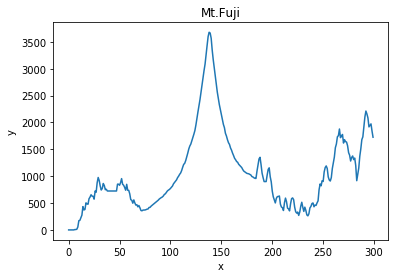

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.plot(x[:,0], y[:,0])
plt.plot(fuji[:,0],fuji[:,3])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mt.Fuji")
plt.show()

## 【問題2】ある地点の勾配を計算する関数を作成

In [24]:
def calc_gradient(now_point):
    d_x = fuji[:,0][now_point] - fuji[:,0][now_point-1]
    d_y = fuji[:,3][now_point] - fuji[:,3][now_point-1]
    gradient = d_y / d_x
    return gradient
    
grad = calc_gradient(10)
print(grad)

117.15


## 【問題3】移動先の地点を計算する関数を作成

In [37]:
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

def celc_nextpoint(now_point, alpha = 0.2):
    next_point = now_point - alpha * calc_gradient(now_point)
    return int(Decimal(next_point).quantize(Decimal('0'), rounding=ROUND_HALF_UP))

next_point = celc_nextpoint(30)
next_point
#print(next_point)

41

## 【問題4】山を下る関数を作成

In [38]:
def down_mountain(now_point, alpha = 0.2):
    break_flg = False
    point_list= []
    point_list.append(now_point)
    #point_list.append(now_point)
    print("-------------------------------------------")
    print("＜MethodCall down_mountain({})＞".format(now_point))
    while point_list[-1] > 0:
        #print(point_list[-1])
        result = celc_nextpoint(point_list[-1], alpha)
        # print("result:{}".format(result))
        
        # 局所最小値でループする可能性があるので、既に通過した地点が出てきたらbreakする。
        for chk_pos in point_list:
            if chk_pos == result:
                # ブレークフラグ設定
                break_flg = True
                print("地点ループ発生({})".format(result))
                break    
                
        if result < 0:
            break                
        elif result > np.max(fuji[:,0]):
            break
  

        point_list.append(result)    

        # どの地点にループしたか分かるようにあえてappend後にbreakする
        if break_flg == True:
            break     
        elif point_list[-2] == point_list[-1] :
            break              
         
        
    return point_list

In [39]:
FUJI_TOP = 136
point_list = down_mountain(FUJI_TOP)
print(point_list)

-------------------------------------------
＜MethodCall down_mountain(136)＞
地点ループ発生(75)
[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75, 75]


## 【問題5】下山過程の可視化

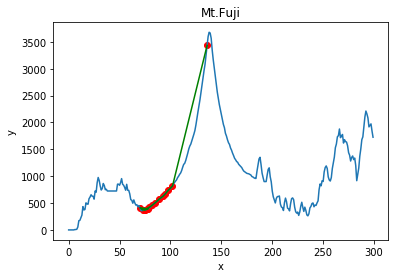

In [40]:
point_array = np.array(point_list)
point_array = point_array.reshape(point_array.shape[0], -1)
height_list =fuji[point_list,3]
height_array = np.array(height_list)
height_array = height_array.reshape(height_array.shape[0], -1) 

plt.plot(fuji[:,0],fuji[:,3])
plt.scatter(point_array,height_array, color = "red")
plt.plot(point_array,height_array, color = "green")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mt.Fuji")
plt.show()

## 【問題6】初期値の変更

In [41]:
#FUJI_TOP = 136
for x_pos in fuji[1:,0]:
    point_list = []
    point_list = down_mountain(int(x_pos))
    print("x_pos:{}, {}".format(x_pos, point_list))
    #print("{}".format(point_list))
    
    

-------------------------------------------
＜MethodCall down_mountain(1)＞
地点ループ発生(1)
x_pos:1.0, [1, 1]
-------------------------------------------
＜MethodCall down_mountain(2)＞
地点ループ発生(2)
x_pos:2.0, [2, 2]
-------------------------------------------
＜MethodCall down_mountain(3)＞
地点ループ発生(3)
x_pos:3.0, [3, 3]
-------------------------------------------
＜MethodCall down_mountain(4)＞
地点ループ発生(4)
x_pos:4.0, [4, 4]
-------------------------------------------
＜MethodCall down_mountain(5)＞
地点ループ発生(5)
x_pos:5.0, [5, 5]
-------------------------------------------
＜MethodCall down_mountain(6)＞
地点ループ発生(5)
x_pos:6.0, [6, 5, 5]
-------------------------------------------
＜MethodCall down_mountain(7)＞
地点ループ発生(7)
x_pos:7.0, [7, 7]
-------------------------------------------
＜MethodCall down_mountain(8)＞
地点ループ発生(7)
x_pos:8.0, [8, 7, 7]
-------------------------------------------
＜MethodCall down_mountain(9)＞
地点ループ発生(1)
x_pos:9.0, [9, 1, 1]
-------------------------------------------
＜MethodCall down_mou

地点ループ発生(239)
x_pos:203.0, [203, 214, 227, 215, 239, 228, 206, 205, 198, 231, 247, 226, 239]
-------------------------------------------
＜MethodCall down_mountain(204)＞
地点ループ発生(164)
x_pos:204.0, [204, 187, 164, 169, 173, 176, 177, 178, 180, 186, 164]
-------------------------------------------
＜MethodCall down_mountain(205)＞
地点ループ発生(205)
x_pos:205.0, [205, 198, 231, 247, 226, 239, 228, 206, 205]
-------------------------------------------
＜MethodCall down_mountain(206)＞
地点ループ発生(206)
x_pos:206.0, [206, 205, 198, 231, 247, 226, 239, 228, 206]
-------------------------------------------
＜MethodCall down_mountain(207)＞
地点ループ発生(205)
x_pos:207.0, [207, 205, 198, 231, 247, 226, 239, 228, 206, 205]
-------------------------------------------
＜MethodCall down_mountain(208)＞
地点ループ発生(239)
x_pos:208.0, [208, 238, 232, 216, 219, 200, 234, 251, 215, 239, 228, 206, 205, 198, 231, 247, 226, 239]
-------------------------------------------
＜MethodCall down_mountain(209)＞
地点ループ発生(239)
x_pos:209.0, [209, 

富士山の標高のグラフが図のようになっているため、局所最小値に落ち込み、地点ループが発生する。

In [42]:
# 地点のリストを受け取り、地点と標高のndarrayを返す関数
def get_ndarray(point_list):
    point_array = np.array(point_list)
    point_array = point_array.reshape(point_array.shape[0], -1)
    height_list =fuji[point_list,3]
    height_array = np.array(height_list)
    height_array = height_array.reshape(height_array.shape[0], -1) 
    return point_array, height_array

-------------------------------------------
＜MethodCall down_mountain(138)＞
地点ループ発生(75)
地点＝138, [138, 58, 169, 188, 158, 191, 274]
-------------------------------------------
＜MethodCall down_mountain(150)＞
地点ループ発生(169)
地点＝150, [150, 169, 173, 176, 177, 178, 180, 186, 164, 169]
-------------------------------------------
＜MethodCall down_mountain(250)＞
地点ループ発生(247)
地点＝250, [250, 253, 247, 226, 239, 228, 206, 205, 198, 231, 247]
-------------------------------------------
＜MethodCall down_mountain(291)＞
地点ループ発生(249)
地点＝291, [291, 254, 263, 249, 230, 249]


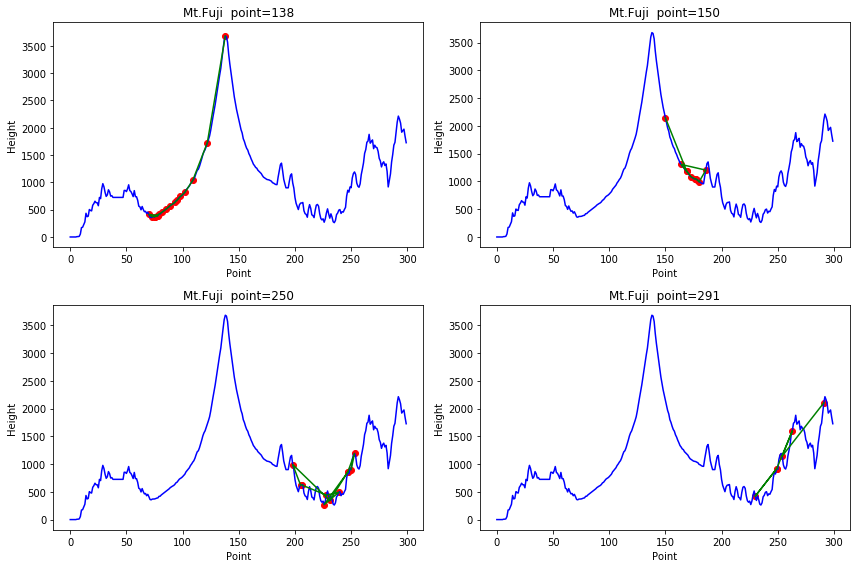

In [119]:
# ＜地点138の場合＞
Set_POINT138 = 138
point_list138 = down_mountain(Set_POINT138)
point_array138, height_array138 = get_ndarray(point_list138)
print("地点＝{}, {}".format(Set_POINT138, point_list100))

# ＜地点150の場合＞
Set_POINT150 = 150
point_list150 = down_mountain(Set_POINT150)
point_array150, height_array150 = get_ndarray(point_list150)
print("地点＝{}, {}".format(Set_POINT150, point_list150))

# ＜地点250の場合＞
Set_POINT250 = 250
point_list250 = down_mountain(Set_POINT250)
point_array250, height_array250 = get_ndarray(point_list250)
print("地点＝{}, {}".format(Set_POINT250, point_list250))

# ＜地点291の場合＞
Set_POINT291 = 291
point_list291 = down_mountain(Set_POINT291)
point_array291, height_array291 = get_ndarray(point_list291)
print("地点＝{}, {}".format(Set_POINT291, point_list291))


# ＊＊＊　　　グラフ描画処理　　　＊＊＊

#figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
fig = plt.figure(figsize=(12, 8), tight_layout = True)

#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
xlabel_text = "Point"
ylabel_text = "Height"
ax1 = fig.add_subplot(2, 2, 1, title ="Mt.Fuji  point={}".format(Set_POINT138), xlabel =xlabel_text, ylabel =ylabel_text)
ax2 = fig.add_subplot(2, 2, 2, title ="Mt.Fuji  point={}".format(Set_POINT150), xlabel =xlabel_text, ylabel =ylabel_text)
ax3 = fig.add_subplot(2, 2, 3, title ="Mt.Fuji  point={}".format(Set_POINT250), xlabel =xlabel_text, ylabel =ylabel_text)
ax4 = fig.add_subplot(2, 2, 4, title ="Mt.Fuji  point={}".format(Set_POINT291), xlabel =xlabel_text, ylabel =ylabel_text)

# ＜地点138の場合＞
ax1.plot(fuji[:,0],fuji[:,3], color = "blue")
ax1.scatter(point_array138,height_array138, color = "red")
ax1.plot(point_array138,height_array138, color = "green")  

# ＜地点150の場合＞
ax2.plot(fuji[:,0],fuji[:,3], color = "blue")
ax2.scatter(point_array150,height_array150, color = "red")
ax2.plot(point_array150,height_array150, color = "green")  

# ＜地点250の場合＞
ax3.plot(fuji[:,0],fuji[:,3], color = "blue")
ax3.scatter(point_array250,height_array250, color = "red")
ax3.plot(point_array250,height_array250, color = "green") 

# ＜地点291の場合＞
ax4.plot(fuji[:,0],fuji[:,3], color = "blue")
ax4.scatter(point_array291,height_array291, color = "red")
ax4.plot(point_array291,height_array291, color = "green") 


【考察】  
①初期値によって、下山する方向が変わる。  
②初期値によって、落ち込む局所最小値が異なる。  

## 【問題7】（アドバンス問題）ハイパーパラメータの変更

-------------------------------------------
＜MethodCall down_mountain(138)＞
学習率＝1.0, [138, 58, 169, 188, 158, 191, 274]
-------------------------------------------
＜MethodCall down_mountain(138)＞
地点ループ発生(74)
学習率＝0.8, [138, 74, 72, 77, 70, 104, 84, 71, 111, 74]
-------------------------------------------
＜MethodCall down_mountain(138)＞
地点ループ発生(76)
学習率＝0.5, [138, 98, 90, 83, 76, 73, 66, 86, 79, 65, 93, 84, 76]
-------------------------------------------
＜MethodCall down_mountain(138)＞
地点ループ発生(77)
学習率＝0.3, [138, 114, 108, 100, 94, 85, 80, 79, 71, 86, 82, 77, 74, 73, 69, 62, 66, 78, 77]
-------------------------------------------
＜MethodCall down_mountain(138)＞
地点ループ発生(75)
学習率＝0.08, [138, 132, 122, 117, 111, 107, 104, 102, 100, 98, 97, 95, 94, 92, 91, 90, 89, 87, 86, 85, 84, 83, 82, 81, 79, 77, 76, 75, 75]
-------------------------------------------
＜MethodCall down_mountain(138)＞
地点ループ発生(80)
学習率＝0.05, [138, 134, 128, 122, 119, 116, 113, 110, 109, 107, 105, 104, 103, 101, 100, 99, 98, 97, 

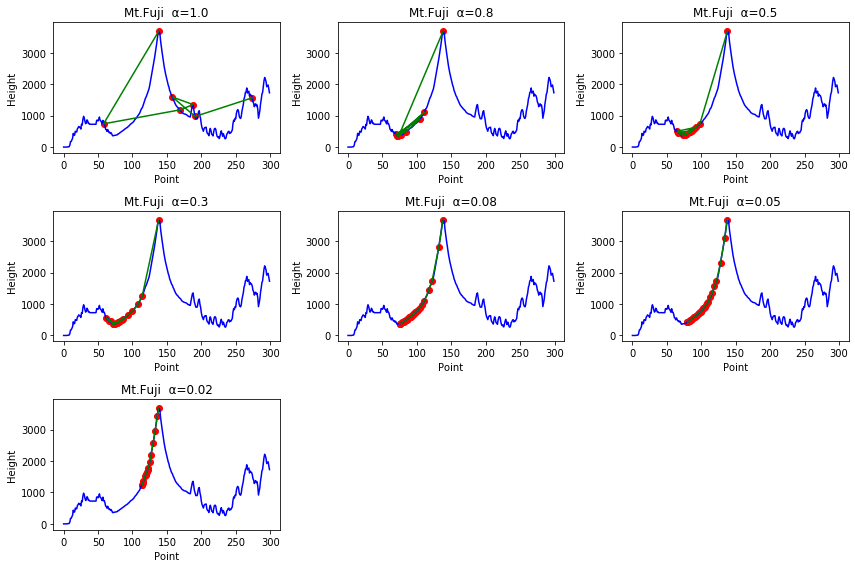

In [116]:
# 富士山頂上の地点138から下山していく場合を想定する。
Set_POINT = 138

# ＜α=1.00の場合＞
alpha100 = 1.00
point_list100 = down_mountain(Set_POINT, alpha100)
point_array100, height_array100 = get_ndarray(point_list100)
print("学習率＝{}, {}".format(alpha100, point_list100))

# ＜α=0.8の場合＞
alpha080 = 0.8
point_list080 = down_mountain(Set_POINT, alpha080)
point_array080, height_array080 = get_ndarray(point_list080)
print("学習率＝{}, {}".format(alpha080, point_list080))

# ＜α=0.5の場合＞
alpha050 = 0.5
point_list050 = down_mountain(Set_POINT, alpha050)
point_array050, height_array050 = get_ndarray(point_list050)
print("学習率＝{}, {}".format(alpha050, point_list050))

# ＜α=0.3の場合＞
alpha030 = 0.3
point_list030 = down_mountain(Set_POINT, alpha030)
point_array030, height_array030 = get_ndarray(point_list030)
print("学習率＝{}, {}".format(alpha030, point_list030))

# ＜α=0.08の場合＞
alpha008 = 0.08
point_list008 = down_mountain(Set_POINT, alpha008)
point_array008, height_array008 = get_ndarray(point_list008)
print("学習率＝{}, {}".format(alpha008, point_list008))

# ＜α=0.05の場合＞
alpha005 = 0.05
point_list005 = down_mountain(Set_POINT, alpha005)
point_array005, height_array005 = get_ndarray(point_list005)
print("学習率＝{}, {}".format(alpha005, point_list005))

# ＜α=0.02の場合＞
alpha002 = 0.02
point_list002 = down_mountain(Set_POINT, alpha002)
point_array002, height_array002 = get_ndarray(point_list002)
print("学習率＝{}, {}".format(alpha002, point_list002))


# ＊＊＊　　　グラフ描画処理　　　＊＊＊

#figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
fig = plt.figure(figsize=(12, 8), tight_layout = True)

#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
xlabel_text = "Point"
ylabel_text = "Height"
ax1 = fig.add_subplot(3, 3, 1, title ="Mt.Fuji  α={}".format(alpha100), xlabel =xlabel_text, ylabel =ylabel_text)
ax2 = fig.add_subplot(3, 3, 2, title ="Mt.Fuji  α={}".format(alpha080), xlabel =xlabel_text, ylabel =ylabel_text)
ax3 = fig.add_subplot(3, 3, 3, title ="Mt.Fuji  α={}".format(alpha050), xlabel =xlabel_text, ylabel =ylabel_text)
ax4 = fig.add_subplot(3, 3, 4, title ="Mt.Fuji  α={}".format(alpha030), xlabel =xlabel_text, ylabel =ylabel_text)
ax5 = fig.add_subplot(3, 3, 5, title ="Mt.Fuji  α={}".format(alpha008), xlabel =xlabel_text, ylabel =ylabel_text)
ax6 = fig.add_subplot(3, 3, 6, title ="Mt.Fuji  α={}".format(alpha005), xlabel =xlabel_text, ylabel =ylabel_text)
ax7 = fig.add_subplot(3, 3, 7, title ="Mt.Fuji  α={}".format(alpha002), xlabel =xlabel_text, ylabel =ylabel_text)

# ＜α=1.00の場合＞
ax1.plot(fuji[:,0],fuji[:,3], color = "blue")
ax1.scatter(point_array100,height_array100, color = "red")
ax1.plot(point_array100,height_array100, color = "green")  

# ＜α=0.8の場合＞
ax2.plot(fuji[:,0],fuji[:,3], color = "blue")
ax2.scatter(point_array080,height_array080, color = "red")
ax2.plot(point_array080,height_array080, color = "green")  

# ＜α=0.5の場合＞
ax3.plot(fuji[:,0],fuji[:,3], color = "blue")
ax3.scatter(point_array050,height_array050, color = "red")
ax3.plot(point_array050,height_array050, color = "green") 

# ＜α=0.3の場合＞
ax4.plot(fuji[:,0],fuji[:,3], color = "blue")
ax4.scatter(point_array030,height_array030, color = "red")
ax4.plot(point_array030,height_array030, color = "green") 

# ＜α=0.08の場合＞
ax5.plot(fuji[:,0],fuji[:,3], color = "blue")
ax5.scatter(point_array008,height_array008, color = "red")
ax5.plot(point_array008,height_array008, color = "green") 

# ＜α=0.05の場合＞
ax6.plot(fuji[:,0],fuji[:,3], color = "blue")
ax6.scatter(point_array005,height_array005, color = "red")
ax6.plot(point_array005,height_array005, color = "green") 

# ＜α=0.02の場合＞
ax7.plot(fuji[:,0],fuji[:,3], color = "blue")
ax7.scatter(point_array002,height_array002, color = "red")
ax7.plot(point_array002,height_array002, color = "green") 



【考察】  
①学習率が大きい方が下山のスピードが速いが、最小値を飛び越して勾配が反転する地点までジャンプしてしまう可能性がある。  
②学習率が小さい場合、下山のスピードは小さくなるが、勾配が反転する地点までジャンプする可能性は低い。  
　しかし、局所最小値の地点に落ち込み、そこから抜け出せない可能性もある。  
③本課題で、標高０地点まで下山するのは困難である。
